### Nome dos integrantes


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py
import plotly.graph_objs as go
import plotly.plotly as py
import plotly.figure_factory as ff

from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import math
%matplotlib inline
import seaborn as sns

from sklearn import metrics, preprocessing, linear_model

import warnings
from collections import Counter
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
from sklearn.model_selection import StratifiedKFold,GridSearchCV

seed =45
% matplotlib inline

In [2]:
#importando dados
#fonte: https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/data
test = pd.read_csv('test.csv', header=0)
train = pd.read_csv('train.csv', header=0)

In [3]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [4]:
#Removendo registros duplicados do test
print('Antes:', test.shape)
test.drop_duplicates()
print('Depois:', test.shape)

Antes: (892816, 58)
Depois: (892816, 58)


In [5]:
#Removendo registros duplicados do train
print('Antes:', train.shape)
train.drop_duplicates()
print('Depois:', train.shape)

Antes: (595212, 59)
Depois: (595212, 59)


In [6]:
#Análise dos conjuntos de dados para observar a distribuição dos atributos
display(train.describe())
display(test.describe())

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,8.928160e+05,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,...,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000
mean,7.441535e+05,1.902371,1.358613,4.413734,0.417361,0.408132,0.393246,0.257191,0.163659,0.185905,...,5.438478,1.440265,2.875013,7.540367,0.123720,0.627756,0.554660,0.287796,0.349344,0.152428
std,4.296830e+05,1.986503,0.663002,2.700149,0.493453,1.355068,0.488471,0.437086,0.369966,0.389030,...,2.330081,1.200620,1.694072,2.745882,0.329262,0.483403,0.497004,0.452736,0.476763,0.359435
min,0.000000e+00,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.720218e+05,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.443070e+05,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.116308e+06,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488026e+06,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,20.000000,11.000000,15.000000,28.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#Criação dos Metadados do conjunto de treino
data = []
for f in train.columns:
    # definindo o uso (entre rótulo, id e atributos)
    if f == 'target':
        role = 'target' # rótulo
    elif f == 'id':
        role = 'id'
    else:
        role = 'input' # atributos
         
    # definindo o tipo do dado
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif train[f].dtype == float:
        level = 'interval'
    elif train[f].dtype == int:
        level = 'ordinal'
        
    # mantem keep como verdadeiro pra tudo, exceto id
    keep = True
    if f == 'id':
        keep = False
    
    # cria o tipo de dado
    dtype = train[f].dtype
    
    # cria dicionário de metadados
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

In [8]:
#Visualização dos Metadados do conjunto de treino
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,binary,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,nominal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


In [9]:
#Contagem dos atributos por tipo de uso e dado
pd.DataFrame({'count' : meta.groupby(['role', 'level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,20
2,input,interval,21
3,input,nominal,16
4,target,binary,1


In [10]:
#Verificar valores faltantes
atributos_missing = []

for f in train.columns:
    missings = train[train[f] == -1][f].count()
    if missings > 0:
        atributos_missing.append(f)
        missings_perc = missings/train.shape[0]
        
        print('Atributo {} tem {} amostras ({:.2%}) com valores faltantes'.format(f, missings, missings_perc))
        
print('No total, há {} atributos com valores faltantes'.format(len(atributos_missing)))

Atributo ps_ind_02_cat tem 216 amostras (0.04%) com valores faltantes
Atributo ps_ind_04_cat tem 83 amostras (0.01%) com valores faltantes
Atributo ps_ind_05_cat tem 5809 amostras (0.98%) com valores faltantes
Atributo ps_reg_03 tem 107772 amostras (18.11%) com valores faltantes
Atributo ps_car_01_cat tem 107 amostras (0.02%) com valores faltantes
Atributo ps_car_02_cat tem 5 amostras (0.00%) com valores faltantes
Atributo ps_car_03_cat tem 411231 amostras (69.09%) com valores faltantes
Atributo ps_car_05_cat tem 266551 amostras (44.78%) com valores faltantes
Atributo ps_car_07_cat tem 11489 amostras (1.93%) com valores faltantes
Atributo ps_car_09_cat tem 569 amostras (0.10%) com valores faltantes
Atributo ps_car_11 tem 5 amostras (0.00%) com valores faltantes
Atributo ps_car_12 tem 1 amostras (0.00%) com valores faltantes
Atributo ps_car_14 tem 42620 amostras (7.16%) com valores faltantes
No total, há 13 atributos com valores faltantes


In [11]:
df_barras = train['target'].value_counts().reset_index(name='count')
df_barras

,index,count
0,0,573518
1,1,21694


In [12]:
#Grafico para verificar o balancemento entre os tipos de Target
x = df_barras['index']
y = df_barras['count']

trace1 = go.Bar(
    x= x,
    y=y,
    text=y,
    name='Balanceamento do Target no Treino',
    textposition = 'auto',
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        ),
    opacity=0.6
)

data = [trace1]
plotly.offline.iplot(data, filename='grouped-bar-direct-labels')

In [13]:
arr = df_barras['index'].values
soma = df_barras['count'].values

In [14]:
#Como percebido o dataset tem um grande desbalancemente do target
colors = ['rgb(158,202,225)', 'rgb(8,48,107)']
trace = go.Pie(labels=arr, values=soma, marker=dict(colors=colors))

data = [trace]
plotly.offline.iplot(data, filename='basic_pie_chart')

In [15]:
# removendo ps_car_03_cat e ps_car_05_cat que tem muitos valores faltantes
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train = train.drop(vars_to_drop, axis=1)
test = test.drop(vars_to_drop, axis=1)
meta.loc[(vars_to_drop),'keep'] = False  # atualiza os metadados para ter como referência (processar o test depois)

In [16]:
# Preenchendo dados faltantes dos atributos com valores faltantes
from sklearn.preprocessing import Imputer

media_imp = Imputer(missing_values=-1, strategy='mean', axis=0)
moda_imp = Imputer(missing_values=-1, strategy='most_frequent', axis=0)
train['ps_reg_03'] = media_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = media_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = media_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = moda_imp.fit_transform(train[['ps_car_11']]).ravel()

test['ps_reg_03'] = media_imp.fit_transform(test[['ps_reg_03']]).ravel()
test['ps_car_12'] = media_imp.fit_transform(test[['ps_car_12']]).ravel()
test['ps_car_14'] = media_imp.fit_transform(test[['ps_car_14']]).ravel()
test['ps_car_11'] = moda_imp.fit_transform(test[['ps_car_11']]).ravel()

In [17]:
# Separando o arquivo do treino entre float e int
train_float = train.select_dtypes(include=['float64'])
train_int = train.select_dtypes(include=['int64'])
Counter(train.dtypes.values)

Counter({dtype('int64'): 46, dtype('float64'): 11})

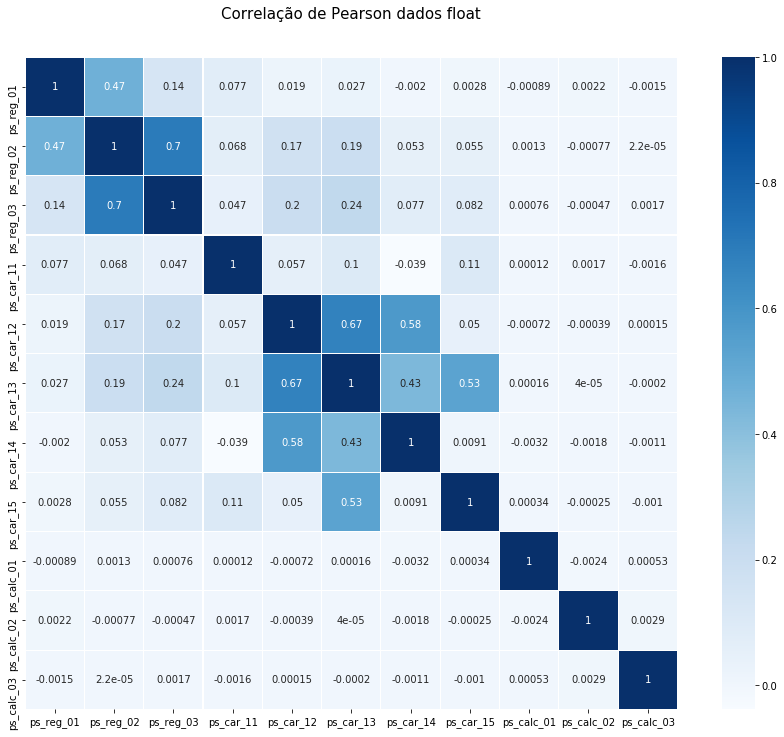

In [18]:
# Verificando a correlação entre as variáveis float
colormap = plt.cm.jet
plt.figure(figsize=(16,12))
plt.title('Correlação de Pearson dados float', y=1.05, size=15)
sns.heatmap(train_float.corr(),linewidths=0.1,vmax=1.0, square=True, cmap='Blues', linecolor='white', annot=True)

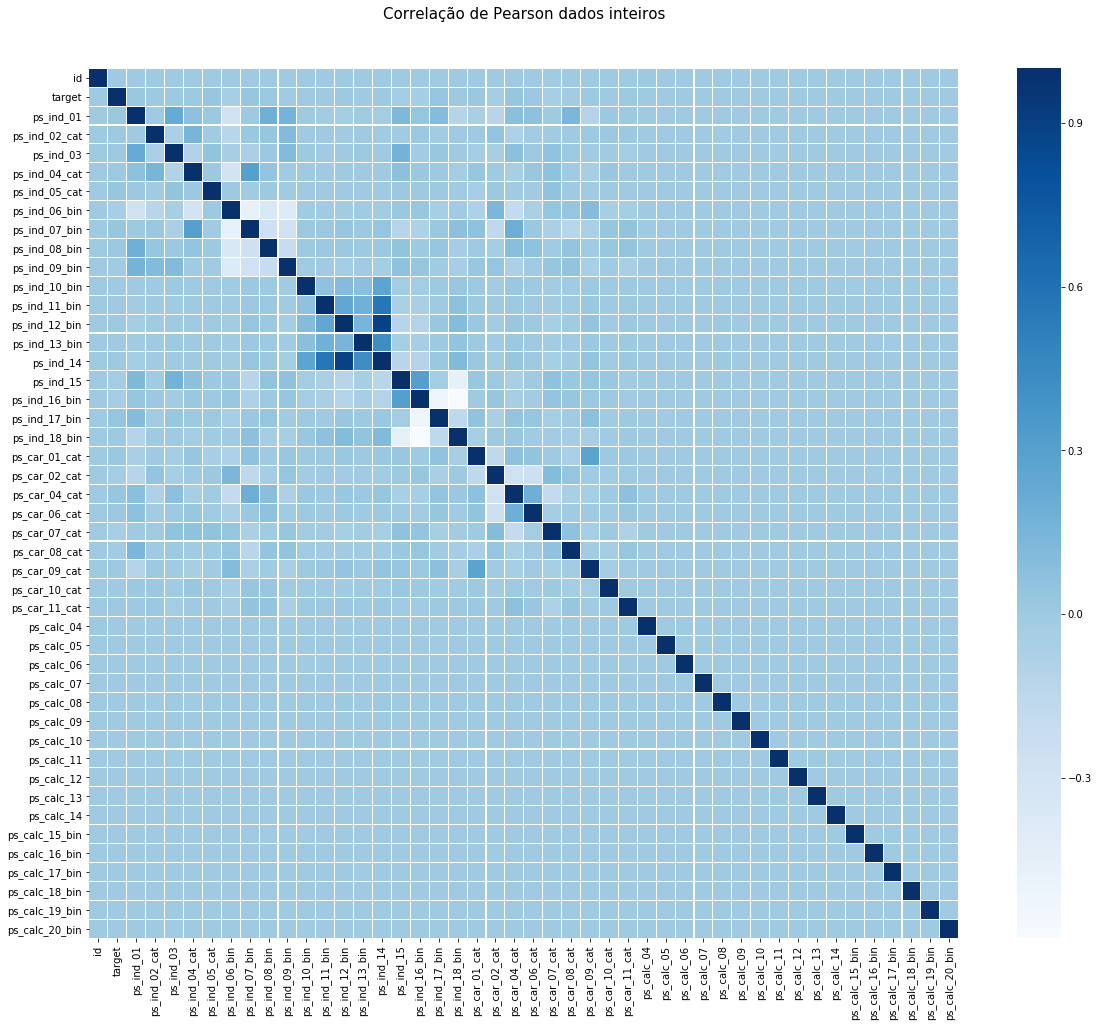

In [19]:
# Verificando a correlação entre as variáveis int
colormap = plt.cm.jet
plt.figure(figsize=(21,16))
plt.title('Correlação de Pearson dados inteiros', y=1.05, size=15)
sns.heatmap(train_int.corr(),linewidths=0.1,vmax=1.0, square=True, cmap='Blues', linecolor='white', annot=False)

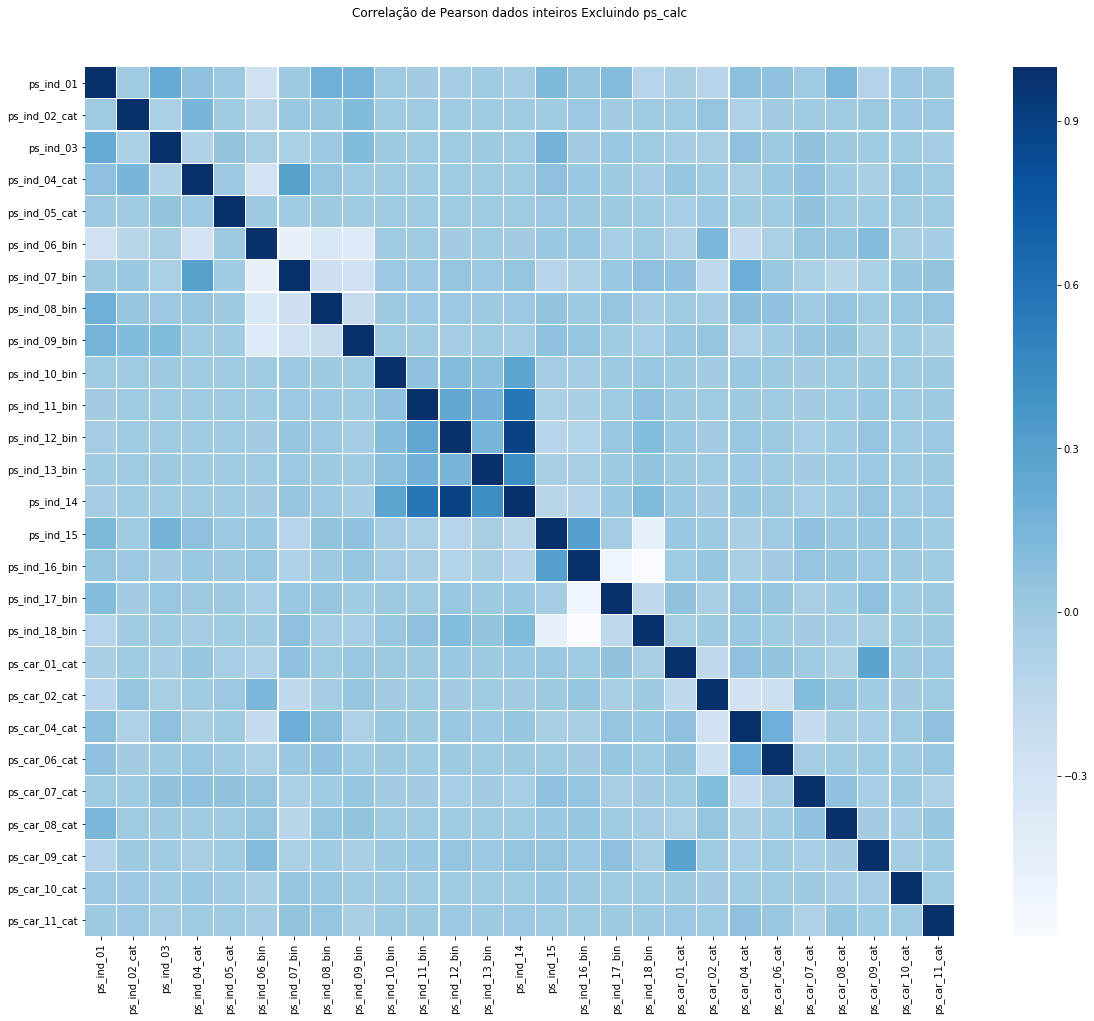

In [20]:
# Como podemos observar Não existe nenhuma correlação entre as variáveis ps_calc e por isso vamos removelas
colormap = plt.cm.jet
cotrain = train_int.drop(['id','target', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin'], axis=1)
plt.figure(figsize=(21,16))
plt.title('Correlação de Pearson dados inteiros Excluindo ps_calc', y=1.05, size=12)
sns.heatmap(cotrain.corr(),linewidths=0.1,vmax=1.0, square=True, cmap='Blues', linecolor='white', annot=False)

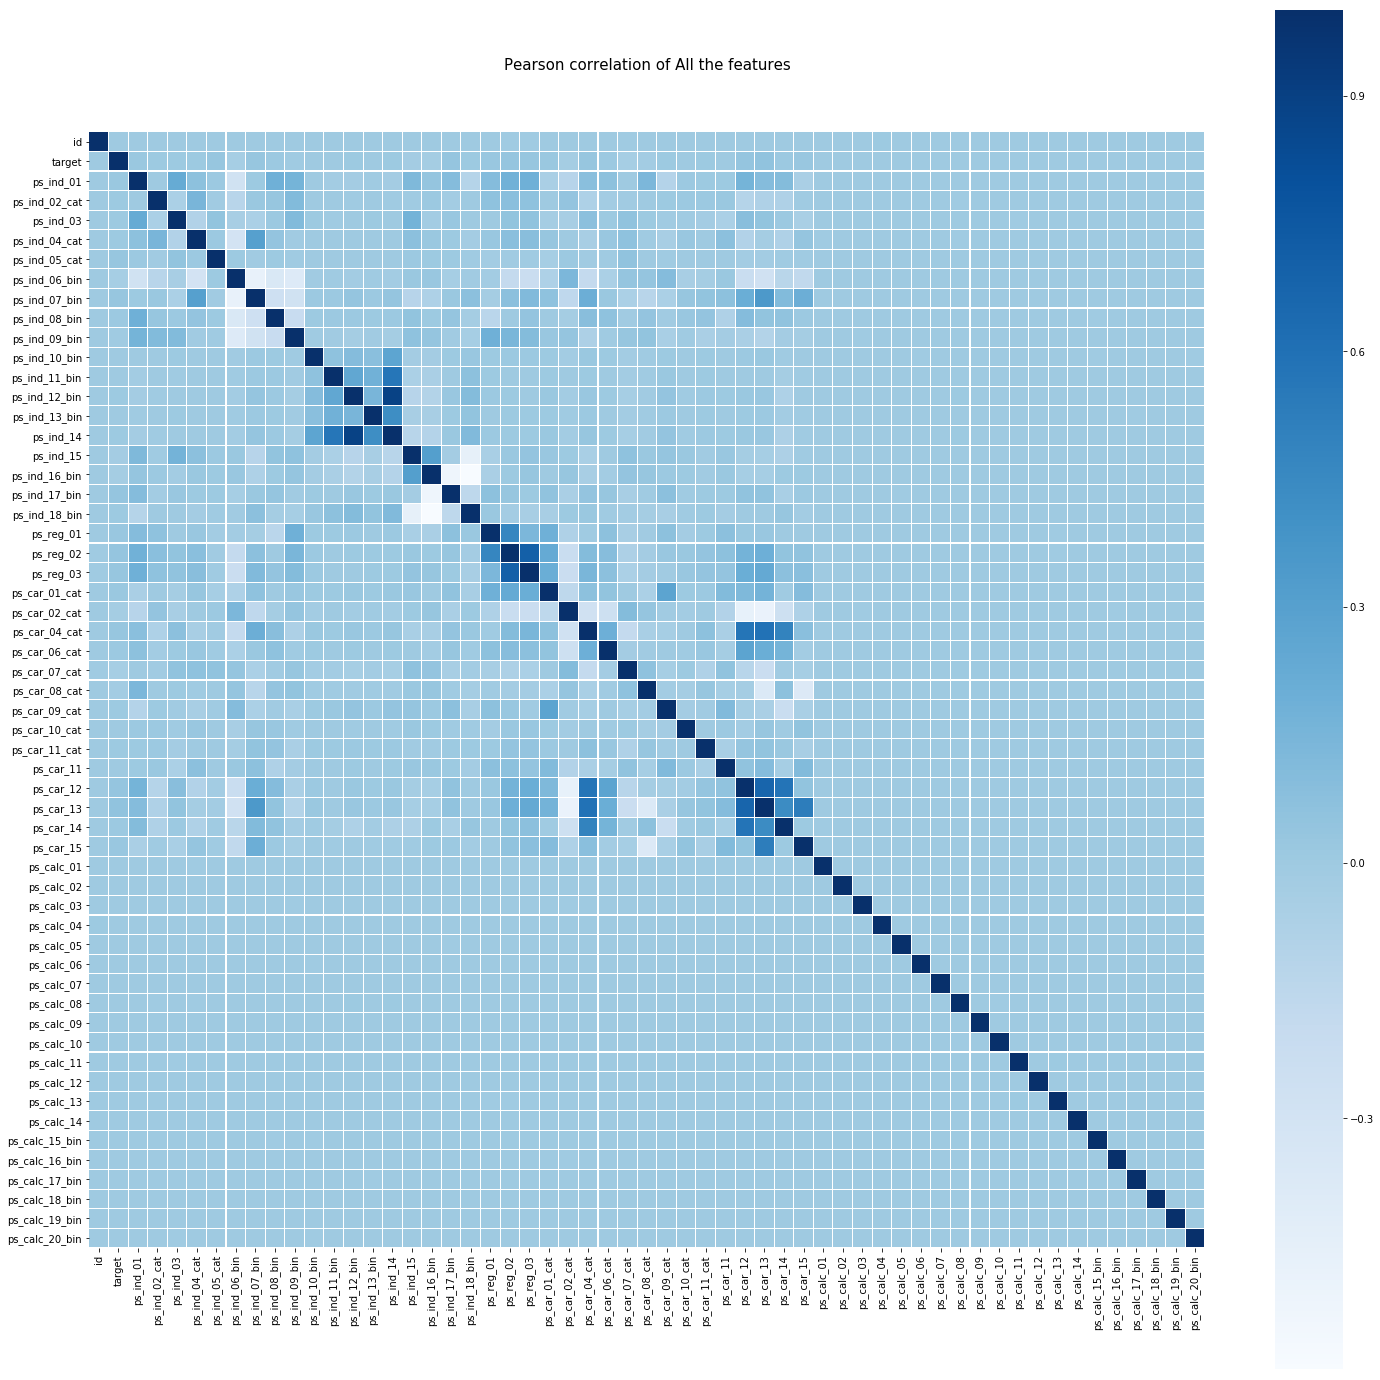

In [21]:
# Verificando a correlação entre todos os dados
colormap = plt.cm.jet
# train = train.drop(['id', 'target'], axis=1)
plt.figure(figsize=(25,25))
plt.title('Pearson correlation of All the features', y=1.05, size=15)
sns.heatmap(train.corr(),linewidths=0.1,vmax=1.0, square=True, cmap='Blues', linecolor='white', annot=False)

In [22]:
# Verificando atributos nomanais para saber valores distintos em cada um
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    dist_values = train[f].value_counts().shape[0]
    print('Atributo {} tem {} valores distintos'.format(f, dist_values))

Atributo ps_ind_02_cat tem 5 valores distintos
Atributo ps_ind_03 tem 12 valores distintos
Atributo ps_ind_04_cat tem 3 valores distintos
Atributo ps_ind_05_cat tem 8 valores distintos
Atributo ps_car_01_cat tem 13 valores distintos
Atributo ps_car_02_cat tem 3 valores distintos
Atributo ps_car_04_cat tem 10 valores distintos
Atributo ps_car_06_cat tem 18 valores distintos
Atributo ps_car_07_cat tem 3 valores distintos
Atributo ps_car_08_cat tem 2 valores distintos
Atributo ps_car_09_cat tem 6 valores distintos
Atributo ps_car_10_cat tem 3 valores distintos
Atributo ps_car_11_cat tem 104 valores distintos
Atributo ps_car_11 tem 4 valores distintos


In [23]:
# Gerando One-hot encoding
v = meta[(meta.level == 'nominal') & (meta.keep)].index
print('Antes do one-hot encoding tinha-se {} atributos'.format(train.shape[1]))
train = pd.get_dummies(train, columns=v, drop_first=True)
print('Depois do one-hot encoding tem-se {} atributos'.format(train.shape[1]))

test = pd.get_dummies(test, columns=v, drop_first=True)
missing_cols = set( train.columns ) - set( test.columns )
for c in missing_cols:
    test[c] = 0
    
train, test = train.align(test, axis=1)

Antes do one-hot encoding tinha-se 57 atributos
Depois do one-hot encoding tem-se 223 atributos


In [24]:
# Verificando Train e Test se tem o mesmo tamanho/formato
print(train.shape)
print(test.shape)

(595212, 223)
(892816, 223)


In [25]:
X_train = train.drop(['id', 'target'], axis=1)
y_train = train['target']

X_test  = test.drop(['id', 'target'], axis=1)
y_test  = test['target']

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6212075052418415

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Test options and evaluation metric
num_folds = 10
seed = 8
scoring = 'accuracy'

X = train.drop(['id','target'], axis=1)
Y = train.target

validation_size = 0.3
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [30]:
models = [('LR', LogisticRegression()), 
          ('LDA', LinearDiscriminantAnalysis()),
          ('CART', DecisionTreeClassifier()),
          ('NB', GaussianNB())]
results = []
names = []
for name, model in models:
    print("Training model %s" %(name))
    model.fit(X_train, Y_train)
    result = model.score(X_test, y_test)
    msg = "Classifier score %s: %f" % (name, result)
    print(msg)
print("----- Training Done -----")

Training model LR
Classifier score LR: 0.999980
Training model LDA
Classifier score LDA: 0.999820
Training model CART
Classifier score CART: 0.953134
Training model NB
Classifier score NB: 0.774181
----- Training Done -----
